# Heatmap
A <mark>**heatmap**</mark> is a graphical representation of data where values are expressed as colors. It is an effective visual summary of information and enables a large volume of data to be communicated efficiently.

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_csv("./data/grad_admit.csv")

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted
0,1,337,118,4,4.5,4.5,3.89,1,Yes
1,2,324,107,4,4.0,4.5,3.58,1,Yes
2,3,316,104,3,3.0,3.5,3.23,1,No
3,4,322,110,3,3.5,2.5,3.50,1,Yes
4,5,314,103,2,2.0,3.0,3.31,0,No


In [12]:
# View correlation between numeric data columns.
df.corr(numeric_only=True)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.047424,-0.063138
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.832669,0.580391
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828019,0.489858
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.745734,0.447783
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718403,0.444029
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.669626,0.396859
GPA,-0.047424,0.832669,0.828019,0.745734,0.718403,0.669626,1.000000,0.521163
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521163,1.000000


## View correlation matrix as a heatmap

Below, we render a heatmap in a family of blue colors. Note that the darker the blue, the higher the correlation between a given variable pair. The lighter the blue, the weaker the correlation between variable pairs.

<Axes: >

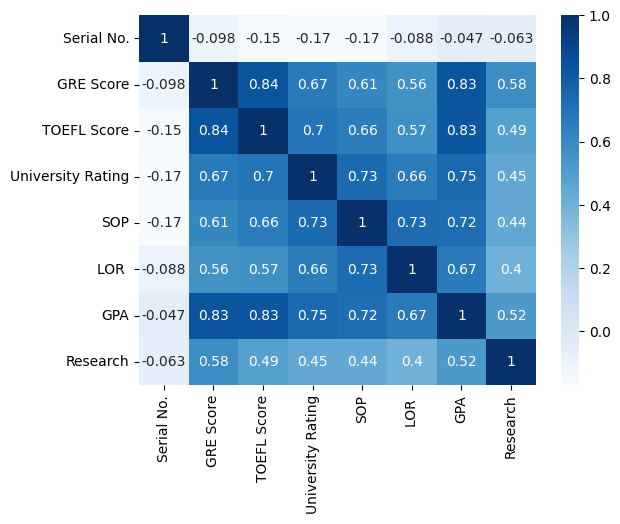

In [13]:
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)

# Heatmap

A heatmap is a common method of visualizing <mark>gene expression changes</mark> from among hundreds to thousands of genes from different treatment conditions. The heatmap may also be combined with clustering methods which group genes and/or samples together based on the similarity of their gene expression pattern. This can be useful for identifying genes that are commonly regulated, or biological signatures associated with a particular condition (e.g a disease or an environmental condition).

Genes are represented in rows of the matrix and chips/samples in the columns. A colored matrix display represents the matrix of values as a grid; the number of rows is equal to the number of genes being analyzed, and the number of columns is equal to the number of chips/samples.
The boxes of the grid are colored according to the numerical value in the corresponding matrix cell (the gene expression values).

<img src='./images/heatmap.png'>

You will be able to pick genes based on their expression levels under different conditions. Some may not change but those that do change are of the greatest interest. These indicate gene expression associated with a particular condition. Heatmaps also help one to identify significant groupings among the genes through associations.

### Sample gene expression data set
Gene names and treatment conditions.

In [14]:
df = pd.read_csv('./data/gene_expression.csv')
df.head()

,Gene,A,B,C,D,E,F
0,B-CHI,4.505700,3.260360,-1.249400,8.89807,8.05955,-0.842803
1,CTL2,3.508560,1.660790,-1.856680,-2.57336,-1.37370,1.196000
2,B-CHI,2.160030,3.146520,0.982809,9.02430,6.05832,-2.967420
3,CTL2,1.884750,2.295690,0.408891,-3.91404,-2.28049,1.628820
4,CHIV,0.255193,-0.761204,-1.022350,3.65059,2.46525,-1.188140


In [16]:
# set column zero as index
df = df.set_index(df.columns[0])

df.head()

,A,B,C,D,E,F
Gene,,,,,,
B-CHI,4.505700,3.260360,-1.249400,8.89807,8.05955,-0.842803
CTL2,3.508560,1.660790,-1.856680,-2.57336,-1.37370,1.196000
B-CHI,2.160030,3.146520,0.982809,9.02430,6.05832,-2.967420
CTL2,1.884750,2.295690,0.408891,-3.91404,-2.28049,1.628820
CHIV,0.255193,-0.761204,-1.022350,3.65059,2.46525,-1.188140


## Heatmap of gene expression data
Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. Below, we use a colormap from red to green with yellow being the central value. The x-axis represents the treatment conditions and the y-axis represents the gene names.

In heatmaps, the data is displayed in a grid where each row represents a gene and each column represents a sample. The color and intensity of the boxes are used to represent changes (not absolute values) of gene expression. In the following heatmap, <mark>red represents down-regulated genes and green represents up-regulated genes. Yellow represents unchanged expression.</mark>

In [19]:
from bioinfokit import visuz, analys

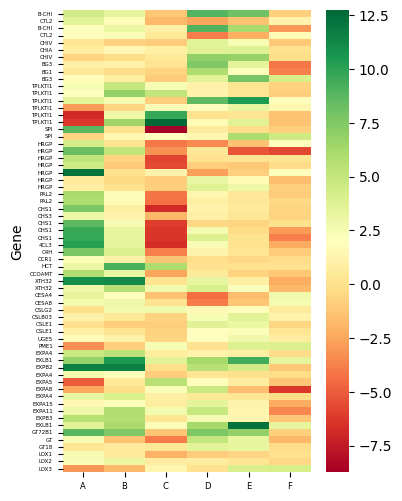

In [20]:
visuz.gene_exp.hmap(df=df, rowclus=False, colclus=False, cmap='RdYlGn', tickfont=(6, 4), show=True)

# Volcano Plot

A **<mark>volcano plot</mark>** is a 2-dimensional scatter plot that has the shape of a volcano. It makes it easy to visualize the expression of thousands of genes obtained from -omics research (e.g., transcriptomics, genomics, proteomics, etc.) and to identify genes with significant changes. It is used to plot the log fold change in the observation between two conditions (e.g., the gene expression between comparison and control conditions) on the x-axis. On the y-axis is the corresponding p-value for each observation, representing the statistical significance of the change (if any) between the different conditions.

A volcano plot can visualize a lot of complex information in one plot. The wider the dispersion of data points in the volcano plot the greater the significance in gene expression changes between two conditions.